# A* Search
This search algorithm builds on what we saw in [breadth-first search](https://colab.research.google.com/drive/1H5ys4qpC6a_TQrVCPaJMgZv2hR_hDnH9?usp=sharing). The A* algorithm utilizes a **heuristic** to estimate the cost to travel between nodes. While heuristics don't generate precise results, they allow us to calculate a relatively low-cost path through our maze.

For this example, we will use the same dungeon we used in the breadth-first demo:

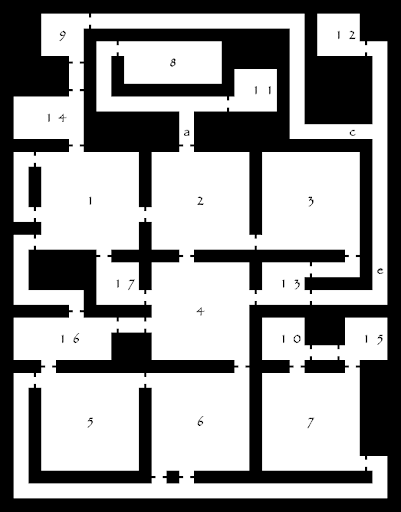

*Map generated by [Donjon](https://donjon.bin.sh/fantasy/dungeon/)*

This is represented in the following graph Python dictionary. We will be creating three separate functions in this code, so we'll initialize the start and end rooms as variables here.

In [ ]:
graph = {
  '1': ['2','14','16','17'],
  '2': ['1', '3','4','8','11'],
  '14': ['1', '9'],
  '16': ['1', '4','5'],
  '17': ['1', '4'],
  '3': ['2', '13'],
  '4': ['2', '16', '17', '13', '6'],
  '8': ['2'],
  '11': ['2'],
  '9': ['14', '12','13'],
  '5': ['16', '6'],
  '13': ['3', '4', '9'],
  '6': ['4', '5', '7'],
  '12': ['9'],
  '7': ['6', '10','15'],
  '10': ['7', '15'],
  '15':['7', '10']
}

start = '1'
goal = '15'

For review, here is our BFS algorithm. We can compare its performance against the A* algorithm once we've written it.

In [ ]:
def BFS(graph, start, goal): 
  visited = []
  seen = [start]
  solution = []           
  while seen:                     
    m = seen.pop(0)              
    visited.append(m)
    solution.append(m)            
    if m == goal:
      return solution          
    for neighbor in graph[m]:
      if neighbor not in visited and neighbor not in seen:    
        seen.append(neighbor)
  return None    

What sets A* apart from BFS is its heuristic function. In the context of AI search, a heuristic is an estimate of the cost of moving from one node to the next. This is also known as a **cost function** in AI. The heuristic for A* is:

*f(n) = h(n) + g(n)*

Where *h(n)* is the cost to travel from the current node to the next node, and *g(n)* is the cost to travel from the next node to the goal node.

To keep things simple, we will use the number of rooms traversed as our unit of measure. This means that the cost to travel from the current room to a directly adjacent room will always be 1. This allows us to focus instead on calculating the cost to travel from the next room to the goal.

The following function backtracks through each node in the graph, starting with the goal node, in order to calculate *g(n)* for each node.

In [ ]:
def Heuristic(graph, start, goal):
  visited = []
  seen = [goal]
  h_list = {}
  h_list[goal] = 0
  dist = 1
  while seen:
    m = seen.pop(0)
    visited.append(m)
    if m not in graph:
      return None
    for n in graph[m]:
      if n not in visited and n not in seen:
        seen.append(n)
        h_list[n] = h_list[m]+1
  visited.clear()
  seen.clear()
  return h_list

Now that we have the heuristic, we can implement our A* algorithm with the following steps:

1.    Create a list for rooms we have visited and another for rooms we have seen.
2.    Add the starting room to the list of rooms seen.
3.    Go to the first room on the "seen" list.
4.    Check if this room is the goal room. If it is, the algorithm is completed; if not, continue to the next step.
5.    Remove the first room from the "seen" list and add it to the "visited" list.
6.    Determine the cost function for each room adjacent to the current room that is not already on the "visited" list.
7.    Add the lowest cost room to the "seen" list. (If multiple rooms have the same cost, add the first one checked.
8.    Repeat, starting at step 3.

The primary difference between this algorithm and BFS is that we use our cost function to determine which rooms to add to the "seen" list instead of just adding all adjacent rooms. This allows us to choose the lowest cost room each step and should theoretically provide us with a near optimal path from our starting room to our objective.

Here is an implementation of A* search in Python:

In [ ]:
def AStarSearch(graph, start, goal):
  h = Heuristic(graph, start, goal) # Use Heuristic to calculate node costs
  if not h:
    return None
  visited = []
  seen = [start]
  solution = []
  while seen:
    m = seen.pop(0)
    visited.append(m)
    solution.append(m)
    if m == goal:
      return solution
    cost = h[m]                     # Retrieve cost of m from heuristic list
    next = ''
    for n in graph[m]:              # Find the lowest cost node adjacent to m
      if n not in visited:         
        if h[n] < cost:
          cost = h[n]
          next = n
    seen.append(next)
  return None

With all of our functions defined, we can now run our A* search and BFS search side-by-side to compare the performance. While both will eventually get us a solution, it's clear that one provides a much more efficient solution than the other.

In [ ]:
# BFS call
print("Breadth-First Search:")
print(BFS(graph, start, goal))

# A* call
print("A* Search:")
print(AStarSearch(graph, start, goal))

Breadth-First Search:
['1', '2', '14', '16', '17', '3', '4', '8', '11', '9', '5', '13', '6', '12', '7', '10', '15']
A* Search:
['1', '2', '4', '6', '7', '15']


Test this out by going back to the first code block and changing the values of the *start* and *goal* variables. You can also try different graphs to see how these algorithms perform under other circumstances.

While A* produces a more optimal solution, it only works when we can estimate the cost of traveling between nodes with some measure of accuracy; whereas, BFS can function in an environment in which no cost information is present. In fact, in this implementation, the A* algorithm requires us to calculate cost using a BFS-based heuristic. This makes it less computationally efficient; however, it produces a more optimal solution.